<a href="https://colab.research.google.com/github/priyanka011011/AI/blob/master/FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
df = pd.read_csv('/customerdata.csv',index_col = 'ID')
df.head() 

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,,,,,,,,,,,
1,D,Flight,4,2,177,3,low,F,44,1233,1
2,F,Flight,4,5,216,2,low,M,59,3088,1
3,A,Flight,2,2,183,4,low,M,48,3374,1
4,B,Flight,3,3,176,4,medium,M,10,1177,1
5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.shape

(10999, 11)

In [ ]:
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Univariate Selection

In [ ]:
print(f'Number of Unique Values in Each Column:\n{df.nunique()}')

Number of Unique Values in Each Column:
Warehouse_block           5
Mode_of_Shipment          3
Customer_care_calls       6
Customer_rating           5
Cost_of_the_Product     215
Prior_purchases           8
Product_importance        3
Gender                    2
Discount_offered         65
Weight_in_gms          4034
Reached.on.Time_Y.N       2
dtype: int64


To find the distinct values in some categorical columns

In [ ]:
df.Warehouse_block.unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [ ]:
df.Mode_of_Shipment.unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [ ]:
df.Product_importance.unique()

array(['low', 'medium', 'high'], dtype=object)

Plotting the categorical features counts

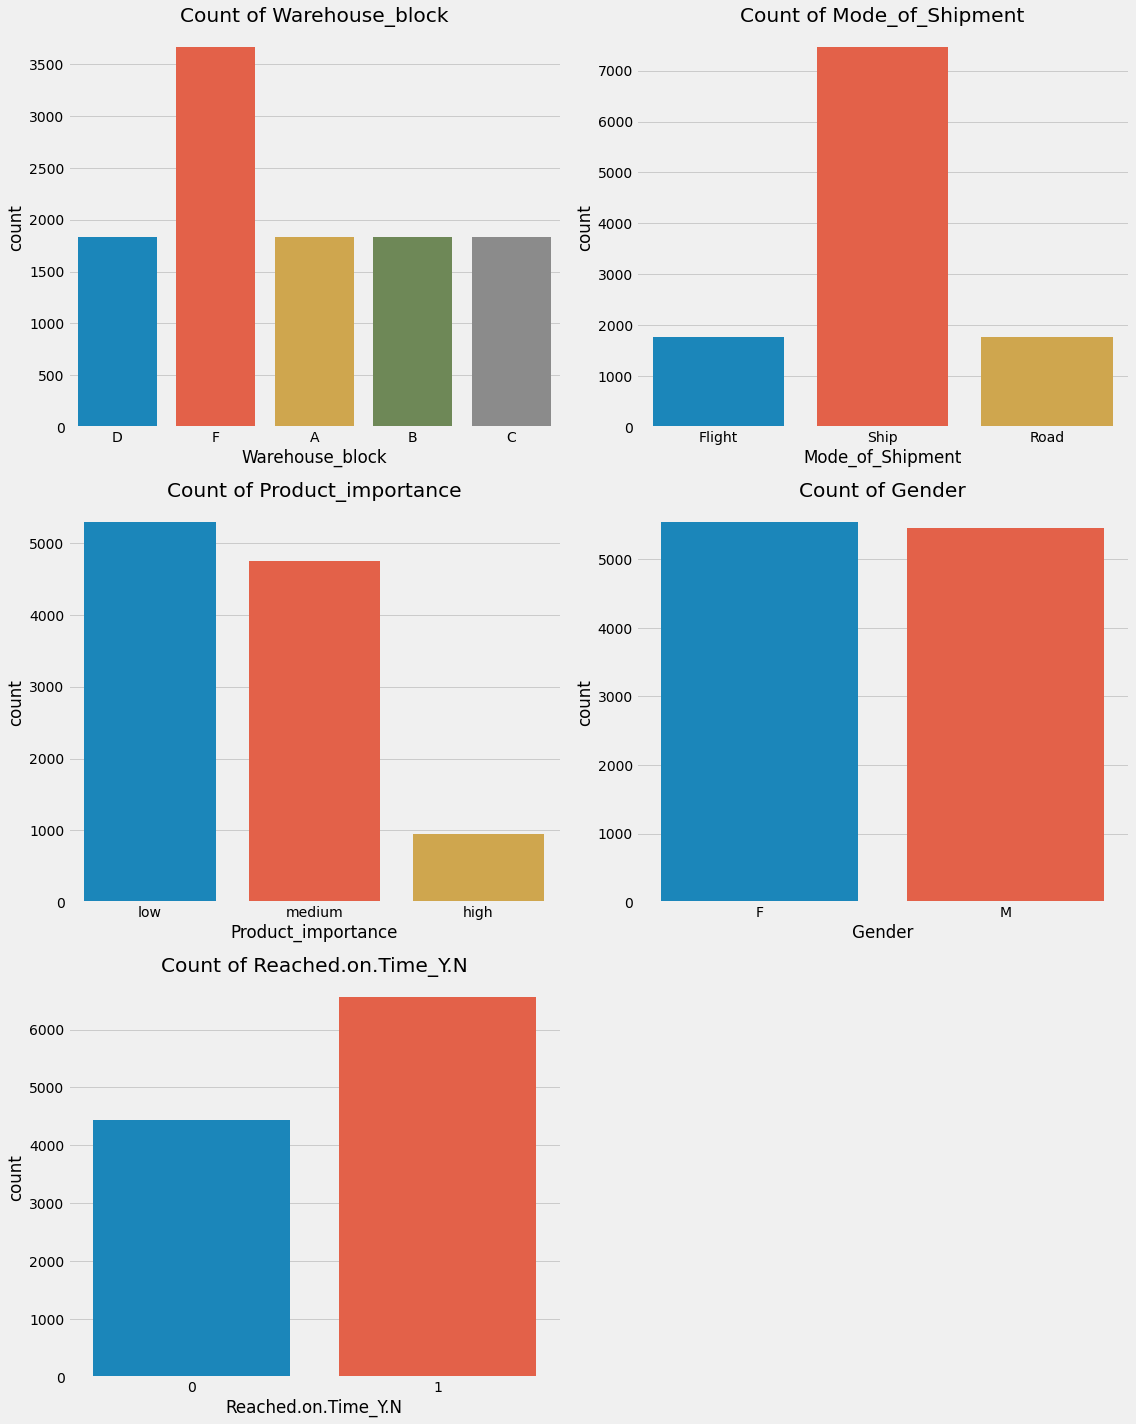

In [ ]:
cat_cols = ['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender',
        'Reached.on.Time_Y.N']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cat_cols)):
        ax = plt.subplot(3, 2, plotnumber)
        sns.countplot(x = cat_cols[i], data = df, ax = ax)
        plt.title(f'Count of {cat_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()


Plotting the numerical features counts

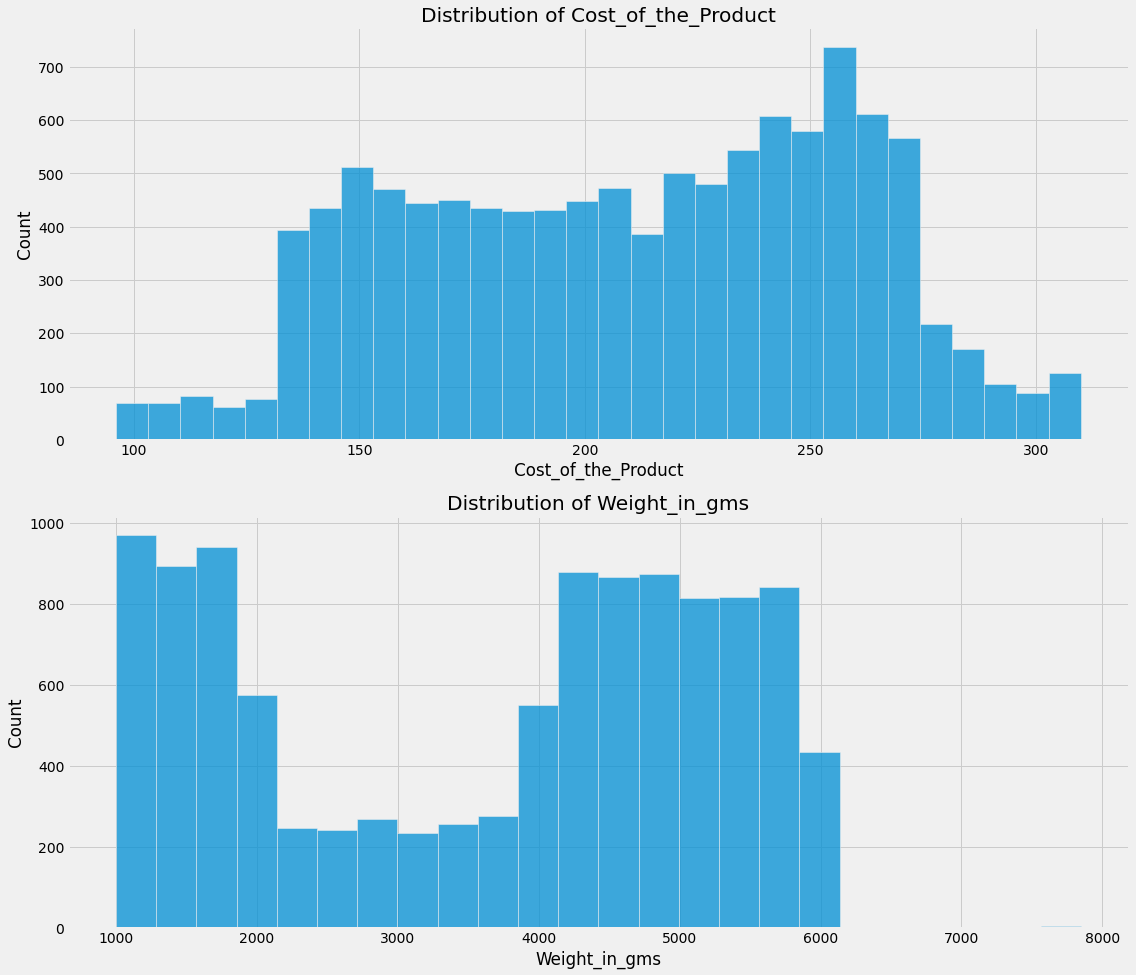

In [ ]:
cont_cols = ['Cost_of_the_Product', 'Weight_in_gms']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(cont_cols)):
        ax = plt.subplot(3, 1, plotnumber)
        sns.histplot(x = cont_cols[i], data = df, ax = ax)
        plt.title(f'Distribution of {cont_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()


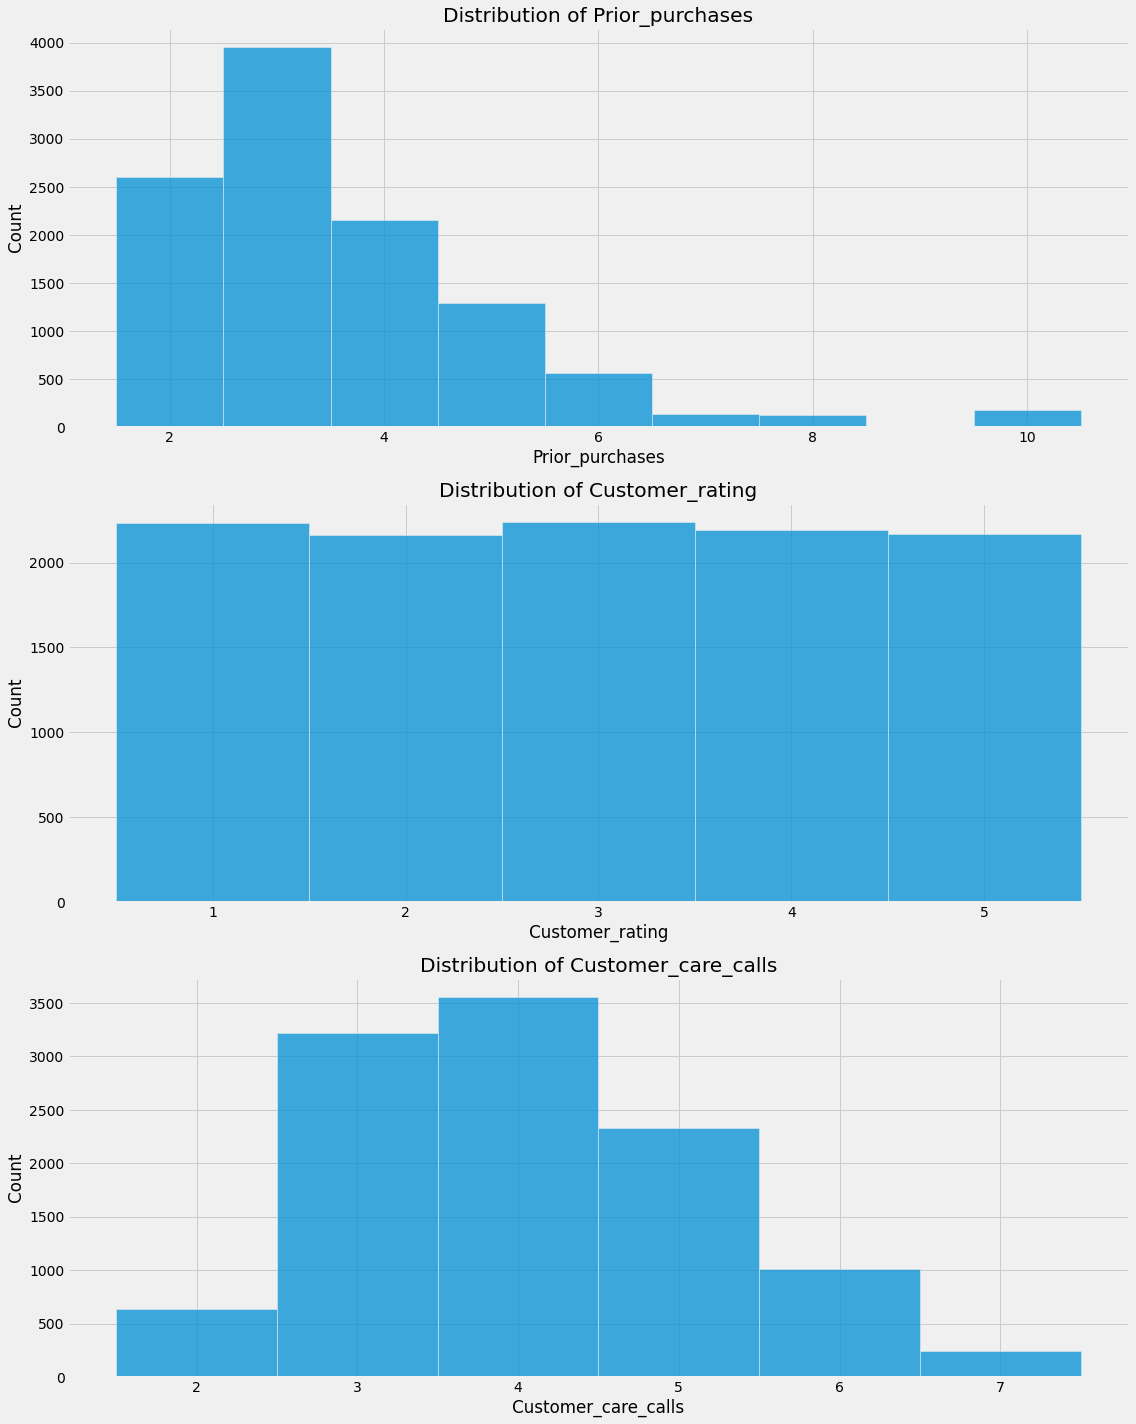

In [ ]:
dis_cols = ['Prior_purchases', 'Customer_rating', 'Customer_care_calls']

plt.figure(figsize = (16, 20))
plotnumber = 1


for i in range(len(dis_cols)):
        ax = plt.subplot(3, 1, plotnumber)
        sns.histplot(x = dis_cols[i], data = df, ax = ax, discrete=True)
        plt.title(f'Distribution of {dis_cols[i]}')
        
        plotnumber += 1

plt.tight_layout()
plt.show()

Conclusions of Univariate Selection
1. Block F has the highest order
2. Most of the orders are shipped via ship transportation.
3. Most customer calls 3-4 times to track their order.
4. The average rating of the customers is less than 3.
5. Most of the customers have 3 previous orders.
6. Orders by male and female are almost equal.
7. Most of the orders cost between $230-270
8. The heaviest orders are under weight 7000. 


Bivariate Selection

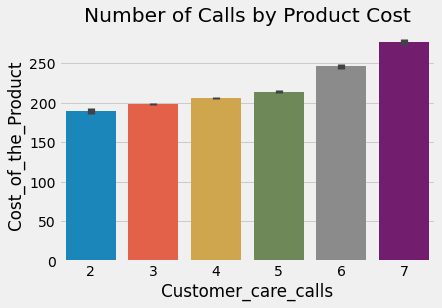

In [ ]:
plt.title('Number of Calls by Product Cost')
g = sns.barplot(x='Customer_care_calls',y='Cost_of_the_Product', data=df)

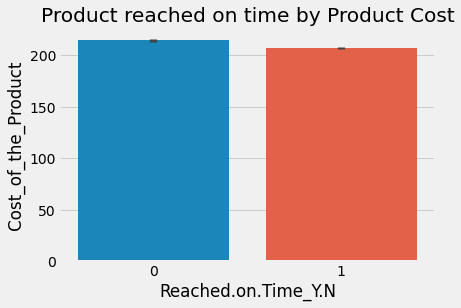

In [ ]:
plt.title('Product reached on time by Product Cost')
g = sns.barplot(y='Cost_of_the_Product',x='Reached.on.Time_Y.N', data=df)

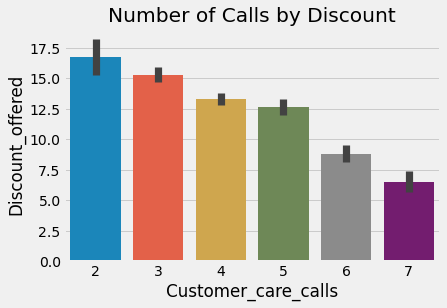

In [ ]:
plt.title('Number of Calls by Discount')
g = sns.barplot(x='Customer_care_calls',y='Discount_offered', data=df)

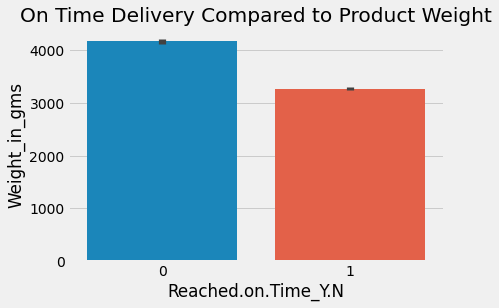

In [ ]:
plt.title('On Time Delivery Compared to Product Weight')
g = sns.barplot(x='Reached.on.Time_Y.N',y='Weight_in_gms', data=df)

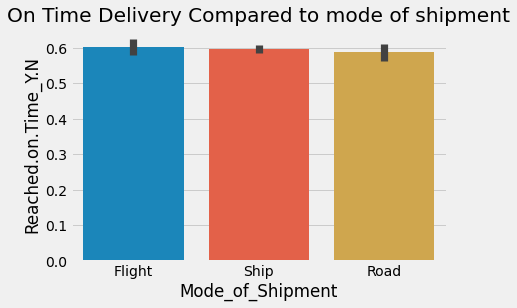

In [ ]:
plt.title('On Time Delivery Compared to mode of shipment')
g = sns.barplot(x='Mode_of_Shipment',y='Reached.on.Time_Y.N', data=df)

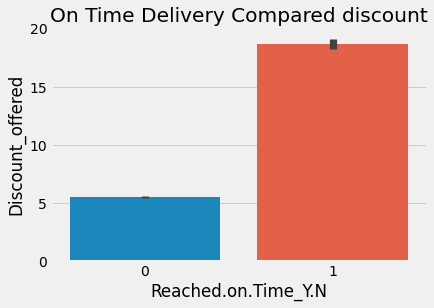

In [ ]:
plt.title('On Time Delivery Compared discount')
g = sns.barplot(x='Reached.on.Time_Y.N',y='Discount_offered', data=df)          

Conclusions Of Bivariate analysis
1. Products with heavy weight are delivered on time.
2. Costly products have higher number of customer calls.
3. Products that are shipped by road are less likely to be delivered on time.
4. Heavy discount products are usually delivered late.

Multivariate Analysis

In [ ]:
df.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


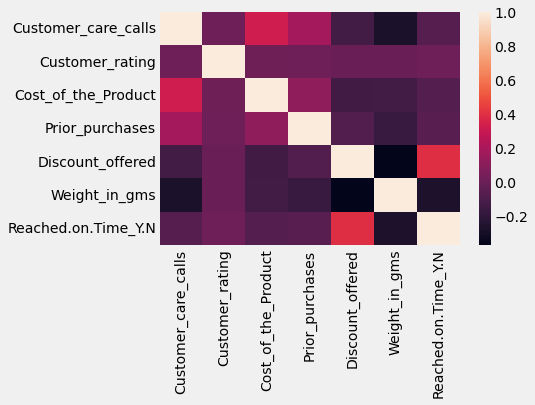

In [ ]:
sns.heatmap(df.corr())
#sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
#plt.show()

Conclusions of Multivariate analysis:
1. The feature that highly correlates to if a product is delivered on time is the product discount offered.
2. Cost of the product and customer care calls are also highly related.